<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Комментарий-ревьюра" data-toc-modified-id="Комментарий-ревьюра-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Комментарий ревьюра</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

<div class="alert alert-block alert-info">
<b>Цель проекта:</b> построить модель, прогнозирующую, уйдет клиент из банка в ближайшее время или нет.

<b>Входные данные:</b> исторические данные о поведении клиентов и расторжении договоров с ними.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.impute import KNNImputer
from sklearn.utils import shuffle
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.dummy import DummyClassifier
from random import randint
import warnings
from pylab import rcParams
rcParams['figure.figsize'] = 8, 4
pd.options.mode.chained_assignment = None 

## Подготовка данных

In [2]:
data = pd.read_csv("/datasets/Churn.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
#Приведем к нижнему регистру названия столбцов
#data.columns = data.columns.str.lower()

In [5]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
for name in data.columns:
    pattern = r"(?=[A-Z])(?!^)"
    rena = re.sub(pattern, '_', name).lower()
    data = data.rename(columns={name:rena})

In [7]:
#Проверим результат
data.columns

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

<div class="alert alert-info">
<h2> Комментарий студента<a class="tocSkip"></h2>
<hr>  
   Добавила, но поясни пожалуйста. Sub же заменяет вхождения в pattern. Каким образом здесь, в данном регулярном выражении, вставляется нижнее подчеркивание между словами?
</div>

In [8]:
data.head()

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [9]:
#приведем поле tenure к целочисленному типу данных
data['tenure'] = data['tenure'].astype("Int64")

In [10]:
#Проверим преобразование
data['tenure'].dtype

Int64Dtype()

In [11]:
#Проверим данные на пропуски
data.isna().sum()

row_number            0
customer_id           0
surname               0
credit_score          0
geography             0
gender                0
age                   0
tenure              909
balance               0
num_of_products       0
has_cr_card           0
is_active_member      0
estimated_salary      0
exited                0
dtype: int64

In [12]:
data[data['tenure'].isna()]

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
30,31,15589475,Azikiwe,591,Spain,Female,39,<NA>,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,<NA>,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,<NA>,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,<NA>,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,<NA>,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,<NA>,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,<NA>,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,<NA>,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,<NA>,123841.49,2,1,0,96833.00,0


In [13]:
data[data['tenure'] == 0]

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
29,30,15656300,Lucciano,411,France,Male,29,0,59697.17,2,1,1,53483.21,0
35,36,15794171,Lombardo,475,France,Female,45,0,134264.04,1,1,0,27822.99,1
57,58,15647091,Endrizzi,725,Germany,Male,19,0,75888.20,1,0,0,45613.75,0
72,73,15812518,Palermo,657,Spain,Female,37,0,163607.18,1,0,1,44203.55,0
127,128,15782688,Piccio,625,Germany,Male,56,0,148507.24,1,1,0,46824.08,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9793,9794,15772363,Hilton,772,Germany,Female,42,0,101979.16,1,1,0,90928.48,0
9799,9800,15722731,Manna,653,France,Male,46,0,119556.10,1,1,0,78250.13,1
9843,9844,15778304,Fan,646,Germany,Male,24,0,92398.08,1,1,1,18897.29,0
9868,9869,15587640,Rowntree,718,France,Female,43,0,93143.39,1,1,0,167554.86,0


<div class="alert alert-block alert-info">
Видим, что в поле Tenure, количество лет, при котором человек является клиентом банка, присутствуют пропуски. Заменить на нули эти пропуски мы не можем, так как уже в датасете присутствуют объекты с значением поля, равным 0. Наиболее целесообразно удалить эти пропуски.
</div>

In [14]:
data.head(1)

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.0,1,1,1,101348.88,1


In [15]:
data[['credit_score', 'age', 'tenure', 'num_of_products', 'estimated_salary']].describe()

,credit_score,age,tenure,num_of_products,estimated_salary
count,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000
mean,650.528800,38.921800,4.997690,1.530200,100090.239881
std,96.653299,10.487806,2.894723,0.581654,57510.492818
min,350.000000,18.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,2.000000,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,2.000000,149388.247500
max,850.000000,92.000000,10.000000,4.000000,199992.480000


<div class="alert alert-info">
<h2> Комментарий студента<a class="tocSkip"></h2>
<hr>  
Проверку на дубликаты и я осуществила изначально в коде ниже.

Методом describe можно проанализировать, как распределены данные (количественные признаки), а также можно выявить аномалии. 

Медиана и среднее в поле credit_score примерно равны, std- небольшое, это говорит о том, что credit_score большинства объектов тяготеет к среднему. Аномалий в данном поле не выявлено.
    
В поле age данные распределены примерно одинаково, аномалий не выявлено.
    
Аналогично и в поле tenure и num_of_products.
    
А вот в поле estimated salary смущает минимальная зарплата.


</div>

In [16]:
#Посмотрим, сколько объектов с зарплатой меньше примерно минимальной
len(data[data['estimated_salary'] < 10000])

508

<AxesSubplot:xlabel='estimated_salary'>

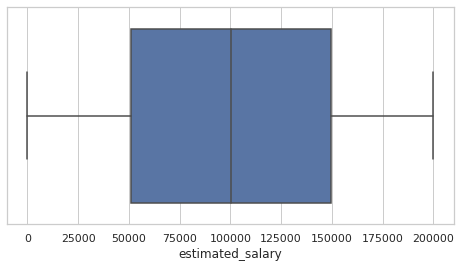

In [17]:
#Посмотрим на диаграмму размаха
sns.set_theme(style="whitegrid")
sns.boxplot(x=data['estimated_salary'])

<div class="alert alert-info">
Судя по диаграмме размаха, выбросов за пределами усов нет, значит не будем отбрасывать данные.
</div>

In [18]:
#Отберем 10% данных с пропусками в tenure
data_for_knn = (
    data[data['tenure'].isna()]
    .sample(frac=0.1, random_state=12345)
)
#удалим все объекты в пропусками в tenure
data = data.dropna(subset=['tenure'])
#присоединим data_for_knn к общему массиву
data = pd.concat([data, data_for_knn])
#Перемешаем объекты
data = shuffle(data, random_state=12345).reset_index(drop=True)

In [19]:
#Проверим количество пропусков после преобразования
data['tenure'].isna().sum()

91

In [20]:
#Отберем количественные признаки
quant_features = ['credit_score', 'age', 'balance', 'tenure', 'estimated_salary', 'exited']

In [21]:
#Замением пропущенные значения при помощи KNNInmputer
imputer = KNNImputer(weights='uniform')
data[quant_features] = imputer.fit_transform(data[quant_features])

In [22]:
#Проверим результат
print("Уникальные значения:", data['tenure'].unique())
print("Количество пропущенных значений:", data['tenure'].isna().sum())

Уникальные значения: [ 8.   5.   4.   7.   3.   6.   9.   0.  10.   2.   1.   3.6  5.4  4.6
  4.8  5.8  5.2  4.4  3.8  3.4  6.8  3.2  6.6  6.2  4.2  6.4  5.6  2.6
  7.6  2.4]
Количество пропущенных значений: 0


In [23]:
#Округлим значения признака tenure
data['tenure'] = round(data['tenure'])

<div class="alert alert-info">
<h2> Комментарий студента<a class="tocSkip"></h2>
<hr>  
Оставила 10% объектов с пропусками

</div>

In [24]:
#Проверим наличие явных дубликатов
data.duplicated().sum()

0

In [25]:
#Изучим корелляцию между некоторыми количественными признаками
columns = ['credit_score', 'age', 'balance', 'estimated_salary', 'exited']

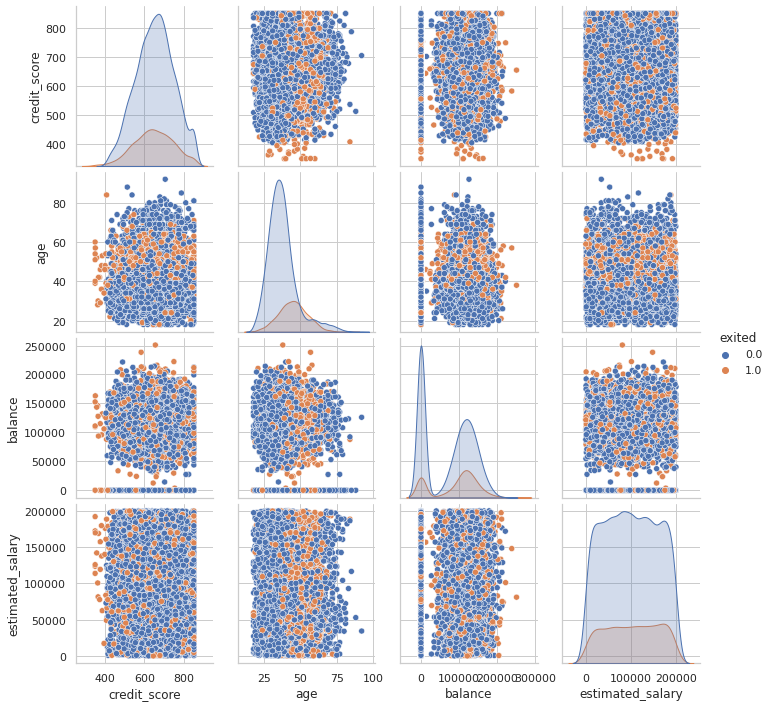

In [26]:
sns.pairplot(data[columns], hue='exited')

<div class="alert alert-block alert-info">
Видим, что зависимость между данными признаками не наблюдается
</div>

In [27]:
#Преобразуем категориальные признаки, посмотрим на количество уникальных значений в данных полях
print('Количество уникальных значений в поле surname', len(data['surname'].unique()))
print('Количество уникальных значений в поле geography', len(data['geography'].unique()))
print('Количество уникальных значений в поле gender', len(data['gender'].unique()))

Количество уникальных значений в поле surname 2803
Количество уникальных значений в поле geography 3
Количество уникальных значений в поле gender 2


<div class="alert alert-block alert-info">
Думаю, поле surname кодировать не нужно, уберем данный признак, а также убрем из датасета признак customerid. Поле gender закодируем техникой One-Hot Encoding, geography - Ordinal Encoding
</div>

In [28]:
data = data.drop(['customer_id', 'surname', 'row_number'], axis=1)

In [29]:
#Кодируем данные с аргументом drop_first=True для того, чтобы не попасть в дамми-ловушку
data_ohe1 = pd.get_dummies(data['gender'], drop_first=True)

In [30]:
data_ohe1.head()

,Male
0,1
1,0
2,0
3,1
4,1


In [31]:
data_ohe2 = pd.get_dummies(data['geography'])

In [32]:
data = data.drop(['geography', 'gender'], axis=1)

In [33]:
data = data.join([data_ohe1, data_ohe2])

In [34]:
data.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,Male,France,Germany,Spain
0,681.0,37.0,8.0,73179.34,2,1,1,25292.53,0.0,1,0,1,0
1,697.0,25.0,5.0,82931.85,2,1,1,128373.88,0.0,0,0,0,1
2,625.0,39.0,5.0,0.00,2,1,0,32615.21,0.0,0,1,0,0
3,789.0,31.0,4.0,175477.15,1,1,1,172832.90,0.0,1,1,0,0
4,795.0,38.0,7.0,125903.22,2,1,1,127068.92,0.0,1,0,1,0


<div class="alert alert-block alert-info">
Теперь необходимо разбить набор данных на обучающую, валидационную и тестовую выборки
</div>

In [35]:
features = data.drop(['exited'], axis=1)
target = data['exited']

In [36]:
x_train, x_valid, y_train, y_valid  = train_test_split(features, target, test_size=0.4, random_state=12345, stratify=target)

In [37]:
print(np.bincount(y_train))
print(np.bincount(y_valid))

[4386 1123]
[2925  748]


In [38]:
x_valid, x_test, y_valid, y_test = train_test_split(x_valid, y_valid, test_size=0.5, random_state=12345, stratify=y_valid)

In [39]:
print(np.bincount(y_valid))
print(np.bincount(y_test))

[1462  374]
[1463  374]


In [40]:
y_train = y_train.reset_index(drop=True)
y_valid = y_valid.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

<div class="alert alert-block alert-info">
Разделили выборку на обучающую, валидационную и тестовую. Принято делить в соотношения 3:1:1. Поэтому сначала выделяем под обучающую 60% набора данных, затем остаток делим на 2 части-валидационную и тестовую.
</div>

In [41]:
#Масштабируем признаки
scaler = StandardScaler()
scaler.fit(x_train)
x_train = pd.DataFrame(scaler.transform(x_train))
scaler.fit(x_valid)
x_valid = pd.DataFrame(scaler.transform(x_valid))
scaler.fit(x_test)
x_test = pd.DataFrame(scaler.transform(x_test))

## Исследование задачи

In [42]:
#Исследуем баланс классов
print('Количество объектов отрицательного класса:',len(data[data['exited'] == 0]))
print('Количество объектов положительного класса:', len(data[data['exited'] == 1]))

Количество объектов отрицательного класса: 7311
Количество объектов положительного класса: 1871


<div class="alert alert-block alert-info">
Баланс классов присутствует, когда соотношение классов в выборке примерно 1:1. В нашем случае можно наблюдать дисбаланс
</div>

In [43]:
#Обучим модель без учета дисбаланса
#Создаем функция для подбора параметров с помощью GridSearchCV
def selection(model, parameters):
    clf = GridSearchCV(model, parameters, verbose=1)
    clf.fit(x_train, y_train)
    return(clf.best_params_)
warnings.filterwarnings('ignore')    

In [44]:
#Передаем нужные параметры и модель решающего дерева в функцию
parameters = {
    "max_depth": [randint(1,16)],
    "random_state": [12345],
    "criterion": ["giny", "entropy"]
}
print(selection(DecisionTreeClassifier(), parameters))

Fitting 5 folds for each of 2 candidates, totalling 10 fits
{'criterion': 'entropy', 'max_depth': 10, 'random_state': 12345}


In [45]:
model_tree = DecisionTreeClassifier(random_state=12345, max_depth=15, criterion='entropy')
model_tree.fit(x_train, y_train)
predictions = model_tree.predict(x_valid)
print('f1_score:', f1_score(y_valid, predictions))
predictions_proba = model_tree.predict_proba(x_valid)
print("ROC-AUC_score", roc_auc_score(y_valid, predictions_proba[:, 1]))

f1_score: 0.5165745856353591
ROC-AUC_score 0.7063459695530991


In [46]:
#Подбор параметров моедели случайного леса
parameters = {
    "max_depth": [randint(1,16)],
    "n_estimators": [randint(1,101)],
    "random_state": [12345],
    "criterion": ["giny", "entropy"]
}
print(selection(RandomForestClassifier(), parameters))

Fitting 5 folds for each of 2 candidates, totalling 10 fits
{'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 27, 'random_state': 12345}


In [47]:
model_forest = RandomForestClassifier(max_depth=15, n_estimators=76, random_state=12345, criterion='entropy')
model_forest.fit(x_train, y_train)
predictions = model_forest.predict(x_valid)
print('f1_score:', f1_score(y_valid, predictions))
predictions_proba = model_forest.predict_proba(x_valid)
print("ROC-AUC_score", roc_auc_score(y_valid, predictions_proba[:,1]))

f1_score: 0.5771812080536913
ROC-AUC_score 0.8477956721800771


In [48]:
#Подбор параметров для логистической регрессии
parameters = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [randint(1,51)],
    'random_state': [12345]
}
print(selection(LogisticRegression(), parameters))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
{'C': 18, 'penalty': 'l2', 'random_state': 12345}


In [49]:
model_regression = LogisticRegression(penalty='l2', C=25, random_state=12345)
model_regression.fit(x_train, y_train)
predictions = model_regression.predict(x_valid)
print('f1_score:', f1_score(y_valid, predictions))
predictions_proba = model_regression.predict_proba(x_valid)
print("ROC-AUC_score", roc_auc_score(y_valid, predictions_proba[:,1]))

f1_score: 0.2769857433808554
ROC-AUC_score 0.7441933619611256


<div class="alert alert-block alert-info">
Обучили 3 модели без учета дисбаланса, наиболее высокое значение метрики f1 показала модель случайного леса, наименьшее значение метрики f1 - логистическая регрессия. Однако качество модели случайного леса недостаточно высокое, чтобы принять ее, необходимо исследовать данные на сбалансированность классов.
    
    
     
</div>

## Борьба с дисбалансом

<div class="alert alert-block alert-info">
Для борьбы с дисбалансом попробуем технику upsampling
</div>

In [50]:
#Создадим функцию, преобразующую данные
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state = 12345)
    
    return features_upsampled, target_upsampled    

In [51]:
#Получим преобразованные техникой upsample выборки
x_train_upsampled, y_train_upsampled = upsample(x_train, y_train, 4)

In [52]:
#Обучим 3 модели и посмотрим на метрику F1
model_tree.fit(x_train_upsampled, y_train_upsampled)
predictions = model_tree.predict(x_valid)
print("f1_score:", f1_score(y_valid, predictions))
predictions_proba = model_tree.predict_proba(x_valid)
print("ROC-AUC_score", roc_auc_score(y_valid, predictions_proba[:,1]))

f1_score: 0.4850657108721625
ROC-AUC_score 0.7140153039203494


In [53]:
model_forest.fit(x_train_upsampled, y_train_upsampled)
predictions = model_forest.predict(x_valid)
print("f1_score:", f1_score(y_valid, predictions))
predictions_proba = model_forest.predict_proba(x_valid)
print("ROC-AUC_score", roc_auc_score(y_valid, predictions_proba[:,1]))

f1_score: 0.6102635228848821
ROC-AUC_score 0.8431595060608499


In [54]:
model_regression.fit(x_train_upsampled, pd.DataFrame(y_train_upsampled))
predictions = model_regression.predict(x_valid)
print("f1_score:", f1_score(y_valid, predictions))
predictions_proba = model_regression.predict_proba(x_valid)
print("ROC-AUC_score", roc_auc_score(y_valid, predictions_proba[:,1]))

f1_score: 0.48192771084337344
ROC-AUC_score 0.7503986919976299


<div class="alert alert-block alert-info">
Видно, что после преобразования обучающих данных техникой upsampled качество моделей значительно улучшилось. 
    
Попробуем технику downsampled
</div>

In [55]:
def downsample(features, target, fraction):
    
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones]
    )
    
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled    

In [56]:
#Получим преобразованные техникой downsample выборки
x_train_downsampled, y_train_downsampled = downsample(x_train, y_train, 0.25)

In [57]:
#Обучим 3 модели и посмотрим на метрику F1
model_tree.fit(x_train_downsampled, y_train_downsampled)
predictions = model_tree.predict(x_valid)
print("f1_score:", f1_score(y_valid, predictions))
predictions_proba = model_tree.predict_proba(x_valid)
print("ROC-AUC_score", roc_auc_score(y_valid, predictions_proba[:,1]))

f1_score: 0.4846225535880709
ROC-AUC_score 0.7007542228432226


In [58]:
model_forest.fit(x_train_downsampled, y_train_downsampled)
predictions = model_forest.predict(x_valid)
print("f1_score:", f1_score(y_valid, predictions))
predictions_proba = model_forest.predict_proba(x_valid)
print("ROC-AUC_score", roc_auc_score(y_valid, predictions_proba[:,1]))

f1_score: 0.5813953488372092
ROC-AUC_score 0.8411084369079059


In [59]:
model_regression.fit(x_train_downsampled, pd.DataFrame(y_train_downsampled))
predictions = model_regression.predict(x_valid)
print("f1_score:", f1_score(y_valid, predictions))
predictions_proba = model_regression.predict_proba(x_valid)
print("ROC-AUC_score", roc_auc_score(y_valid, predictions_proba[:,1]))

f1_score: 0.48148148148148145
ROC-AUC_score 0.7492117603166125


<div class="alert alert-block alert-info">
Видно, что после преобразования обучающих данных техникой downsampled качество моделей немного ухудшилось по метрике f1, но auc_roc_score для случайного леса стал выше.
</div>

## Тестирование модели

<div class="alert alert-block alert-info">
Перед тестирование модели объединим тестовую и валидационную выборки. Протестируем на модели случайного леса, обученной на данных, преобразованных техникой upsample и downsample.

</div>

In [60]:
x_test = pd.concat([x_test, x_valid])
y_test = pd.concat([y_test, y_valid])

In [61]:
model_forest.fit(x_train_upsampled, y_train_upsampled)
predictions = model_forest.predict(x_test)
print("f1_score:", f1_score(y_test, predictions))
predictions_proba = model_forest.predict_proba(x_test)
print("ROC-AUC_score", roc_auc_score(y_test, predictions_proba[:,1]))

f1_score: 0.6204081632653061
ROC-AUC_score 0.8533518442341972


<div class="alert alert-block alert-info">
    
**Вывод:** 
    
Для прогнозирования оттока клиентов наилучшей является модель случайного леса, обученная на данных, преобразованных техникой upsample (наивысшее значение метрики f1).
    
    
</div>

In [62]:
#Проверка на адекватность модели
dc_mf = DummyClassifier()
dc_mf.fit(x_train, y_train)
y_pred = dc_mf.predict(x_test)
print("f1_score константной модели:", f1_score(y_test, y_pred))
print("Accuracy константной модели:", accuracy_score(y_test, y_pred))
print("Accuracy лучшей модели:", accuracy_score(y_test, predictions))

f1_score константной модели: 0.0
Accuracy константной модели: 0.7963517560577185
Accuracy лучшей модели: 0.848080588075143


<div class="alert alert-info">
<h2> Комментарий студента<a class="tocSkip"></h2>
<hr>  
Проверка на адекватность показала, что accuracy модели случайного леса выше, чем accuracy константной модели.
</div>